In [10]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import normalize,StandardScaler
from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss,roc_auc_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve
#Algorithms
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
##################################################
import seaborn as sns
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [11]:
Dataset = pd.read_csv("Dataset_Final.csv")

In [12]:
Dataset.isnull().sum()

Unnamed: 0                        0
Hospital_Name                     0
Age                               0
BMI                               0
LOS                               0
Average_Daily_Use_Cigarettes      0
Hookah_Consumption                0
SystolicBP                        0
DiastolicBP                       0
Respiratory_rate                  0
Oxygen_Saturation_Percent         0
Intubation_Duration_Day           0
ICU_LOS                           0
Total_Lung_Involvement_Percent    0
NIV_Duration_Day                  0
Total_Lung_Involvement_Rank       8
Sex                               0
Current_Smoking                   0
History_hookah                    0
Drug_history                      0
Sweating                          0
Fever                             0
Dyspnea                           0
Chestpain                         0
Abnormal_Lung_Signs               0
Diabetes                          0
Hypertension                      0
Cancers                     

In [13]:
Dataset.drop("Unnamed: 0", axis = 1 , inplace=True)
Dataset.drop("Hospital_Name", axis = 1 , inplace=True)
Dataset.drop("Total_Lung_Involvement_Rank", axis = 1 , inplace=True)
Dataset.drop("Hookah_Consumption", axis = 1 , inplace=True)
Dataset.drop("LOS", axis = 1 , inplace=True)
Dataset.drop("ICU_LOS", axis = 1 , inplace=True)
Dataset.head()

,Age,BMI,Average_Daily_Use_Cigarettes,SystolicBP,DiastolicBP,Respiratory_rate,Oxygen_Saturation_Percent,Intubation_Duration_Day,Total_Lung_Involvement_Percent,NIV_Duration_Day,...,Cancers,Cardiovascular_Disease,CKD,COPD,Immunosuppressant_Drugs,Antihypertensive_drug,Pantoprazole,Hospitalization_14_days_ago,ICU_admission,Death
0,61.0,20.500000,0.0,122.422697,78.0,19.718638,91.0,0,0.0,0,...,0,0,0,0,0,1,0,0.0,1.0,1
1,74.0,26.700000,0.0,40.000000,75.0,16.000000,75.0,0,0.0,0,...,0,1,1,0,0,0,1,1.0,1.0,1
2,51.0,29.100000,0.0,122.422697,78.0,19.718638,91.0,0,0.0,0,...,0,0,0,0,0,0,0,1.0,1.0,1
3,64.0,41.000000,0.0,136.000000,78.0,20.000000,95.0,0,0.0,0,...,0,0,0,0,0,0,0,0.0,1.0,0
4,20.0,26.148507,0.0,113.000000,76.0,19.000000,92.0,0,0.0,0,...,0,0,0,0,0,0,0,0.0,2.0,1


In [14]:
#Controlling Outlier data
data_mean, data_std = np.mean(Dataset['Age']), np.std(Dataset['Age'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Age'] if x < lower or x > upper]
print('Age Column Identified outliers: %d' % len(outliers))
#############################################################################################
data_mean, data_std = np.mean(Dataset['BMI']), np.std(Dataset['BMI'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['BMI'] if x < lower or x > upper]
print('BMI Column Identified outliers: %d' % len(outliers))


for i in range(len(Dataset['BMI'])):
    if Dataset['BMI'][i] < lower:
        Dataset['BMI'][i] = lower
        
        
for i in range(len(Dataset['BMI'])):
    if Dataset['BMI'][i] > upper:
        Dataset['BMI'][i] = upper
        

outliers = [x for x in Dataset['BMI'] if x < lower or x > upper]
print('BMI Column Identified outliers: %d' % len(outliers))
#############################################################################################
data_mean, data_std = np.mean(Dataset['Average_Daily_Use_Cigarettes']), np.std(Dataset['Average_Daily_Use_Cigarettes'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Average_Daily_Use_Cigarettes'] if x < lower or x > upper]
print('Average_Daily_Use_Cigarettes Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Average_Daily_Use_Cigarettes'])):
    if Dataset['Average_Daily_Use_Cigarettes'][i] < lower:
        Dataset['Average_Daily_Use_Cigarettes'][i] = lower
        
        
for i in range(len(Dataset['Average_Daily_Use_Cigarettes'])):
    if Dataset['Average_Daily_Use_Cigarettes'][i] > upper:
        Dataset['Average_Daily_Use_Cigarettes'][i] = upper
        

outliers = [x for x in Dataset['Average_Daily_Use_Cigarettes'] if x < lower or x > upper]
print('Average_Daily_Use_Cigarettes Column Identified outliers: %d' % len(outliers))
#############################################################################################
data_mean, data_std = np.mean(Dataset['SystolicBP']), np.std(Dataset['SystolicBP'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['SystolicBP'] if x < lower or x > upper]
print('SystolicBP Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['SystolicBP'])):
    if Dataset['SystolicBP'][i] < lower:
        Dataset['SystolicBP'][i] = lower
        
        
for i in range(len(Dataset['SystolicBP'])):
    if Dataset['SystolicBP'][i] > upper:
        Dataset['SystolicBP'][i] = upper
        

outliers = [x for x in Dataset['SystolicBP'] if x < lower or x > upper]
print('SystolicBP Column Identified outliers: %d' % len(outliers))
#############################################################################################
data_mean, data_std = np.mean(Dataset['DiastolicBP']), np.std(Dataset['DiastolicBP'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['DiastolicBP'] if x < lower or x > upper]
print('DiastolicBP Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['DiastolicBP'])):
    if Dataset['DiastolicBP'][i] < lower:
        Dataset['DiastolicBP'][i] = lower
       

for i in range(len(Dataset['DiastolicBP'])):
    if Dataset['DiastolicBP'][i] > upper:
        Dataset['DiastolicBP'][i] = upper
    

outliers = [x for x in Dataset['DiastolicBP'] if x < lower or x > upper]
print('DiastolicBP Column Identified outliers: %d' % len(outliers))
#############################################################################################
data_mean, data_std = np.mean(Dataset['Respiratory_rate']), np.std(Dataset['Respiratory_rate'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Respiratory_rate'] if x < lower or x > upper]
print('Respiratory_rate Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Respiratory_rate'])):
    if Dataset['Respiratory_rate'][i] < lower:
        Dataset['Respiratory_rate'][i] = lower
 
        
for i in range(len(Dataset['Respiratory_rate'])):
    if Dataset['Respiratory_rate'][i] > upper:
        Dataset['Respiratory_rate'][i] = upper
   

outliers = [x for x in Dataset['Respiratory_rate'] if x < lower or x > upper]
print('Respiratory_rate Column Identified outliers: %d' % len(outliers))
#############################################################################################
data_mean, data_std = np.mean(Dataset['Oxygen_Saturation_Percent']), np.std(Dataset['Oxygen_Saturation_Percent'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Oxygen_Saturation_Percent'] if x < lower or x > upper]
print('Oxygen_Saturation_Percent Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Oxygen_Saturation_Percent'])):
    if Dataset['Oxygen_Saturation_Percent'][i] < lower:
        Dataset['Oxygen_Saturation_Percent'][i] = lower

        
for i in range(len(Dataset['Oxygen_Saturation_Percent'])):
    if Dataset['Oxygen_Saturation_Percent'][i] > upper:
        Dataset['Oxygen_Saturation_Percent'][i] = upper


outliers = [x for x in Dataset['Oxygen_Saturation_Percent'] if x < lower or x > upper]
print('Oxygen_Saturation_Percent Column Identified outliers: %d' % len(outliers))
#############################################################################################
data_mean, data_std = np.mean(Dataset['Intubation_Duration_Day']), np.std(Dataset['Intubation_Duration_Day'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Intubation_Duration_Day'] if x < lower or x > upper]
print('Intubation_Duration_Day Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Intubation_Duration_Day'])):
    if Dataset['Intubation_Duration_Day'][i] < lower:
        Dataset['Intubation_Duration_Day'][i] = lower

        
for i in range(len(Dataset['Intubation_Duration_Day'])):
    if Dataset['Intubation_Duration_Day'][i] > upper:
        Dataset['Intubation_Duration_Day'][i] = upper


outliers = [x for x in Dataset['Intubation_Duration_Day'] if x < lower or x > upper]
print('Intubation_Duration_Day Column Identified outliers: %d' % len(outliers))
#############################################################################################
data_mean, data_std = np.mean(Dataset['Total_Lung_Involvement_Percent']), np.std(Dataset['Total_Lung_Involvement_Percent'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Total_Lung_Involvement_Percent'] if x < lower or x > upper]
print('Total_Lung_Involvement_Percent Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Total_Lung_Involvement_Percent'])):
    if Dataset['Total_Lung_Involvement_Percent'][i] < lower:
        Dataset['Total_Lung_Involvement_Percent'][i] = lower

        
for i in range(len(Dataset['Total_Lung_Involvement_Percent'])):
    if Dataset['Total_Lung_Involvement_Percent'][i] > upper:
        Dataset['Total_Lung_Involvement_Percent'][i] = upper


outliers = [x for x in Dataset['Total_Lung_Involvement_Percent'] if x < lower or x > upper]
print('Total_Lung_Involvement_Percent Column Identified outliers: %d' % len(outliers))
#############################################################################################
data_mean, data_std = np.mean(Dataset['NIV_Duration_Day']), np.std(Dataset['NIV_Duration_Day'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['NIV_Duration_Day'] if x < lower or x > upper]
print('NIV_Duration_Day Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['NIV_Duration_Day'])):
    if Dataset['NIV_Duration_Day'][i] < lower:
        Dataset['NIV_Duration_Day'][i] = lower

        
for i in range(len(Dataset['NIV_Duration_Day'])):
    if Dataset['NIV_Duration_Day'][i] > upper:
        Dataset['NIV_Duration_Day'][i] = upper


outliers = [x for x in Dataset['NIV_Duration_Day'] if x < lower or x > upper]
print('NIV_Duration_Day Column Identified outliers: %d' % len(outliers))

Age Column Identified outliers: 0
BMI Column Identified outliers: 8
BMI Column Identified outliers: 0
Average_Daily_Use_Cigarettes Column Identified outliers: 8
Average_Daily_Use_Cigarettes Column Identified outliers: 0
SystolicBP Column Identified outliers: 9
SystolicBP Column Identified outliers: 0
DiastolicBP Column Identified outliers: 9
DiastolicBP Column Identified outliers: 0
Respiratory_rate Column Identified outliers: 6
Respiratory_rate Column Identified outliers: 0
Oxygen_Saturation_Percent Column Identified outliers: 14
Oxygen_Saturation_Percent Column Identified outliers: 0
Intubation_Duration_Day Column Identified outliers: 13
Intubation_Duration_Day Column Identified outliers: 0
Total_Lung_Involvement_Percent Column Identified outliers: 30
Total_Lung_Involvement_Percent Column Identified outliers: 0
NIV_Duration_Day Column Identified outliers: 11
NIV_Duration_Day Column Identified outliers: 0


C:\Users\alish\AppData\Local\Temp\ipykernel_2688\1012456011.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset['BMI'][i] = upper
C:\Users\alish\AppData\Local\Temp\ipykernel_2688\1012456011.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset['Average_Daily_Use_Cigarettes'][i] = upper
C:\Users\alish\AppData\Local\Temp\ipykernel_2688\1012456011.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset['SystolicBP'][i

In [15]:
X = Dataset[Dataset.columns.difference(["Death"])] 
Y = Dataset["Death"]

In [16]:
sm = SMOTE(random_state=42)
X_balanced, Y_balanced = sm.fit_resample(X, Y)

In [17]:
X_balanced[['Age', 'BMI','Average_Daily_Use_Cigarettes',
       'SystolicBP', 'DiastolicBP', 'Respiratory_rate',
       'Oxygen_Saturation_Percent', 'Intubation_Duration_Day', 'Total_Lung_Involvement_Percent'
       ,'NIV_Duration_Day']] = normalize(X_balanced[['Age', 'BMI', 'Average_Daily_Use_Cigarettes',
       'SystolicBP', 'DiastolicBP', 'Respiratory_rate',
       'Oxygen_Saturation_Percent', 'Intubation_Duration_Day', 'Total_Lung_Involvement_Percent'
       ,'NIV_Duration_Day']])
X_balanced.head()

,Abnormal_Lung_Signs,Age,Antihypertensive_drug,Average_Daily_Use_Cigarettes,BMI,CKD,COPD,Cancers,Cardiovascular_Disease,Chestpain,...,Immunosuppressant_Drugs,Intubation_Duration_Day,NIV_Duration_Day,Oxygen_Saturation_Percent,Pantoprazole,Respiratory_rate,Sex,Sweating,SystolicBP,Total_Lung_Involvement_Percent
0,0,0.331393,1,0.0,0.111370,0,0,0,0,0,...,0,0.0,0.0,0.494373,0,0.107125,1.0,0,0.665082,0.0
1,0,0.504618,0,0.0,0.182071,1,0,0,1,0,...,0,0.0,0.0,0.511437,1,0.109106,1.0,0,0.420918,0.0
2,0,0.279945,0,0.0,0.159734,0,0,0,0,0,...,0,0.0,0.0,0.499511,0,0.108238,1.0,0,0.671994,0.0
3,0,0.322031,0,0.0,0.187998,0,0,0,0,0,...,0,0.0,0.0,0.478015,0,0.100635,1.0,0,0.684317,0.0
4,0,0.118566,0,0.0,0.155016,0,0,0,0,0,...,0,0.0,0.0,0.545404,0,0.112638,1.0,0,0.669898,0.0


In [18]:
def display_results(results):
    print(f'Best parameters are: {results.best_params_}')
    print(f'Best Score is : {results.best_score_} ')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')
        
def showResults(model, modelType , X, Y):
    scores_accuracy = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
    scores_log_loss = cross_val_score(model, X, Y, cv=10, scoring='neg_log_loss')
    scores_briar = cross_val_score(model, X, Y, cv=10, scoring='neg_brier_score')
    scores_auc = cross_val_score(model, X, Y, cv=10, scoring='roc_auc')
    scores_recall = cross_val_score(model, X, Y, cv=10, scoring='recall')
    scores_precision = cross_val_score(model, X, Y, cv=10, scoring='precision')
    scores_f1 = cross_val_score(model, X, Y, cv=10, scoring='f1')
    print('K-fold cross-validation results:')
    print(modelType ," average accuracy is %2.3f" % scores_accuracy.mean())
    print(modelType ," average log_loss is %2.3f" % -scores_log_loss.mean())
    print(modelType ," average brier score is %2.3f" % -scores_briar.mean())
    print(modelType ," average auc is %2.3f" % scores_auc.mean())
    print(modelType ," average recall is %2.3f" % scores_recall.mean())
    print(modelType ," average precision is %2.3f" % scores_precision.mean())
    print(modelType ," average f1 is %2.3f" % scores_f1.mean())

In [19]:
#Statistical Input
X = X_balanced[["Age", "Oxygen_Saturation_Percent", "Sweating", "Abnormal_Lung_Signs", "CKD",
             "Hospitalization_14_days_ago", "BMI", "Sex", "Current_Smoking", "Fever", "Chestpain",
               "Hypertension", "Cancers", "Cardiovascular_Disease", "Immunosuppressant_Drugs", 
                "Antihypertensive_drug", "Pantoprazole"]]
Y = Y_balanced

In [20]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=100,
                   max_depth = 15, learning_rate = 0.1, colsample_bytree = 0.8)
svc = SVC(random_state=5, 
          C = 100, 
          gamma=1,
          kernel='rbf',
          probability=True)
mlp = MLPClassifier(max_iter=5000, 
                    random_state=5, 
                    activation = 'tanh', 
                    alpha = 0.05, 
                    hidden_layer_sizes = (15,10), 
                    learning_rate = 'constant', 
                    solver = 'lbfgs')
rf = RandomForestClassifier(random_state=5, 
                            max_depth = 16, 
                            min_samples_leaf = 3, 
                            min_samples_split = 8, 
                            n_estimators = 700)
dt = DecisionTreeClassifier(random_state=5, 
                            criterion = 'entropy',
                            max_depth = 8,
                            min_samples_leaf = 3, 
                            min_samples_split = 12)
knn = KNeighborsClassifier(metric = 'manhattan',
                            n_neighbors = 8,
                            weights = 'distance')
lr = LogisticRegression(random_state=5, 
                        C = 100,
                        penalty = 'l1', 
                        solver = 'liblinear')
nb = GaussianNB(var_smoothing= 0.003511191734215131)

In [21]:
estimators=[("XGboost", xgb), ("RandomForest", rf),
           ("DecisionTree", dt), ("KNN", knn), ("LogisticRegression", lr)]

ensemble = VotingClassifier(estimators, voting='soft')

ensemble.fit(X,Y)

showResults(ensemble, "Ensemble", X, Y)

K-fold cross-validation results:
Ensemble  average accuracy is 0.833
Ensemble  average log_loss is 0.402
Ensemble  average brier score is 0.125
Ensemble  average auc is 0.903
Ensemble  average recall is 0.830
Ensemble  average precision is 0.826
Ensemble  average f1 is 0.821


In [22]:
#Statistical Input With Post admission variables
X = X_balanced[["Age", "Oxygen_Saturation_Percent", "Sweating", "Abnormal_Lung_Signs", "CKD",
             "Hospitalization_14_days_ago", "BMI", "Sex", "Current_Smoking", "Fever", "Chestpain",
               "Hypertension", "Cancers", "Cardiovascular_Disease", "Immunosuppressant_Drugs", 
                "Antihypertensive_drug", "Pantoprazole",'Intubation_Duration_Day','NIV_Duration_Day',
               "ICU_admission"]]
Y = Y_balanced

In [23]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=900,
                   max_depth = 10, learning_rate = 0.01, colsample_bytree = 0.3)
svc = SVC(random_state=5, C = 100, gamma=0.1,kernel='rbf',probability=True)
mlp = MLPClassifier(max_iter=5000, random_state=5, activation = 'logistic', alpha = 0.05, 
                    hidden_layer_sizes = 15, learning_rate = 'constant', solver = 'lbfgs')
rf = RandomForestClassifier(random_state=5, 
                            max_depth = 16, 
                            min_samples_leaf = 3, 
                            min_samples_split = 10, 
                            n_estimators = 300)
dt = DecisionTreeClassifier(random_state=5, 
                            criterion = 'gini',
                            max_depth = 16,
                            min_samples_leaf = 3, 
                            min_samples_split = 12)
knn = KNeighborsClassifier(metric = 'manhattan',
                            n_neighbors = 18,
                            weights = 'distance')
lr = LogisticRegression(random_state=5, 
                        C = 1,
                        penalty = 'l1', 
                        solver = 'liblinear')
nb = GaussianNB(var_smoothing= 0.02310129700083159)

In [24]:
estimators=[("XGboost", xgb), ("SVM", svc), ("MLP", mlp), ("RandomForest", rf),
           ("DecisionTree", dt)]

ensemble = VotingClassifier(estimators, voting='soft')

ensemble.fit(X,Y)

showResults(ensemble, "Ensemble", X, Y)

K-fold cross-validation results:
Ensemble  average accuracy is 0.877
Ensemble  average log_loss is 0.306
Ensemble  average brier score is 0.092
Ensemble  average auc is 0.929
Ensemble  average recall is 0.868
Ensemble  average precision is 0.882
Ensemble  average f1 is 0.872


In [26]:
#Feature Importance with extratreesclassifier Input
X = X_balanced[["Age" , "Oxygen_Saturation_Percent", "CKD","Respiratory_rate", "DiastolicBP", "SystolicBP",
                "BMI","Cancers","Average_Daily_Use_Cigarettes" ,"Fever", "Pantoprazole", "Abnormal_Lung_Signs",
                "Drug_history", "Current_Smoking", "Diabetes", "Cardiovascular_Disease" , "Dyspnea", "Hospitalization_14_days_ago",
                "Hypertension", "Antihypertensive_drug"]]
Y = Y_balanced

In [27]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=700,
                   max_depth = 15, learning_rate = 0.01, colsample_bytree = 0.3)
svc = SVC(random_state=5, C = 100, gamma=1,kernel='rbf',probability=True)
mlp = MLPClassifier(max_iter=5000, random_state=5, activation = 'relu', alpha = 0.0001, 
                    hidden_layer_sizes = 15, learning_rate = 'constant', solver = 'lbfgs')
rf = RandomForestClassifier(random_state=5, 
                            max_depth = 16, 
                            min_samples_leaf = 3, 
                            min_samples_split = 8, 
                            n_estimators = 900)
dt = DecisionTreeClassifier(random_state=5, 
                            criterion = 'entropy',
                            max_depth = 16,
                            min_samples_leaf = 3, 
                            min_samples_split = 10)
knn = KNeighborsClassifier(metric = 'manhattan',
                            n_neighbors = 8,
                            weights = 'distance')
lr = LogisticRegression(random_state=5, 
                        C = 1,
                        penalty = 'l1', 
                        solver = 'liblinear')
nb = GaussianNB(var_smoothing= 0.002848035868435802)

In [28]:
estimators=[("XGboost", xgb), ("MLP", mlp), ("RandomForest", rf),
           ("DecisionTree", dt)]

ensemble = VotingClassifier(estimators, voting='soft')

ensemble.fit(X,Y)

showResults(ensemble, "Ensemble", X, Y)

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

K-fold cross-validation results:
Ensemble  average accuracy is 0.860
Ensemble  average log_loss is 0.361
Ensemble  average brier score is 0.113
Ensemble  average auc is 0.916
Ensemble  average recall is 0.842
Ensemble  average precision is 0.870
Ensemble  average f1 is 0.850


C:\Users\alish\anaconda3\lib\site-packages\sklearn\calibration.py:964: FutureWarning: The normalize argument is deprecated in v1.1 and will be removed in v1.3. Explicitly normalizing y_prob will reproduce this behavior, but it is recommended that a proper probability is used (i.e. a classifier's `predict_proba` positive class or `decision_function` output calibrated with `CalibratedClassifierCV`).
  warnings.warn(


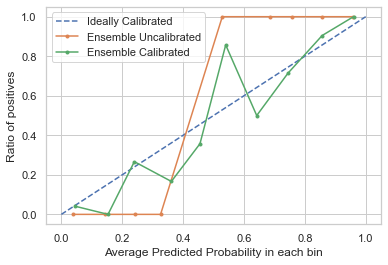

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2, random_state=5)
calibrated = CalibratedClassifierCV(ensemble, method='sigmoid', cv=10)
calibrated.fit(xtrain, ytrain)
probs = calibrated.predict_proba(xtest)[:, 1]
uncalibrated = ensemble.predict_proba(xtest)[:,1]
fop_uncalibrated, mpv_uncalibrated = calibration_curve(ytest, uncalibrated, n_bins=10, normalize=True)
fop_calibrated, mpv_calibrated = calibration_curve(ytest, probs, n_bins=10, normalize=True)
plt.plot([0, 1], [0, 1], linestyle='--', label = 'Ideally Calibrated')
plt.plot(mpv_uncalibrated, fop_uncalibrated, marker='.', label = 'Ensemble Uncalibrated')
plt.plot(mpv_calibrated, fop_calibrated, marker='.', label = 'Ensemble Calibrated')
leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

In [30]:
calibrated = CalibratedClassifierCV(ensemble, method='sigmoid', cv=10)

showResults(calibrated, "Ensemble Cal", X, Y)

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

K-fold cross-validation results:
Ensemble Cal  average accuracy is 0.853
Ensemble Cal  average log_loss is 0.356
Ensemble Cal  average brier score is 0.108
Ensemble Cal  average auc is 0.923
Ensemble Cal  average recall is 0.815
Ensemble Cal  average precision is 0.874
Ensemble Cal  average f1 is 0.832


In [10]:
#Feature Importance with extratreesclassifier Input + Post admission variables
X = X_balanced[["ICU_admission", "Age", "Oxygen_Saturation_Percent", "CKD", "DiastolicBP", "Respiratory_rate",
               "SystolicBP", "Intubation_Duration_Day", "BMI", "Cancers", "Dyspnea", "Drug_history", "Pantoprazole",
               "Abnormal_Lung_Signs", "Fever", "Cardiovascular_Disease", "Antihypertensive_drug", "Hypertension",
               "Hospitalization_14_days_ago", "Average_Daily_Use_Cigarettes"]]
Y = Y_balanced

In [11]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=300,
                   max_depth = 15, learning_rate = 0.1, colsample_bytree = 0.3)
svc = SVC(random_state=5, C = 100, gamma=0.1,kernel='rbf',probability=True)
mlp = MLPClassifier(max_iter=5000, random_state=5, activation = 'tanh', alpha = 0.05, 
                    hidden_layer_sizes = 5, learning_rate = 'constant', solver = 'lbfgs')
rf = RandomForestClassifier(random_state=5, 
                            max_depth = 16, 
                            min_samples_leaf = 3, 
                            min_samples_split = 8, 
                            n_estimators = 100)
dt = DecisionTreeClassifier(random_state=5, 
                            criterion = 'entropy',
                            max_depth = 16,
                            min_samples_leaf = 3, 
                            min_samples_split = 12)
knn = KNeighborsClassifier(metric = 'manhattan',
                            n_neighbors = 20,
                            weights = 'distance')
lr = LogisticRegression(random_state=5, 
                        C = 100,
                        penalty = 'l1', 
                        solver = 'liblinear')
nb = GaussianNB(var_smoothing= 0.004328761281083057)

In [19]:
estimators=[("XGboost", xgb), ("SVM", svc),  ("RandomForest", rf),
           ("DecisionTree", dt), ("LogisticRegression", lr)]

ensemble = VotingClassifier(estimators, voting='soft')

ensemble.fit(X,Y)

showResults(ensemble, "Ensemble", X, Y)

K-fold cross-validation results:
Ensemble  average accuracy is 0.881
Ensemble  average log_loss is 0.327
Ensemble  average brier score is 0.095
Ensemble  average auc is 0.926
Ensemble  average recall is 0.872
Ensemble  average precision is 0.890
Ensemble  average f1 is 0.877


In [20]:
#RFECV with Logistic Regression Input
X = X_balanced[["Abnormal_Lung_Signs", "Antihypertensive_drug", "CKD", "COPD", "Cancers", "Cardiovascular_Disease", 
                "Chestpain", "Current_Smoking", "Diabetes", "Drug_history", "Dyspnea", "Fever", "History_hookah", 
                "Hospitalization_14_days_ago", "Hypertension", "Immunosuppressant_Drugs", "Oxygen_Saturation_Percent", 
                "Pantoprazole", "Sex", "Sweating"]]
Y = Y_balanced

In [21]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=900,
                   max_depth = 10, learning_rate = 0.001, colsample_bytree = 0.5)
svc = SVC(random_state=5, C = 100, gamma=0.1,kernel='rbf',probability=True)
mlp = MLPClassifier(max_iter=5000, random_state=5, activation = 'tanh', alpha = 0.0001, 
                    hidden_layer_sizes = (15,10), learning_rate = 'constant', solver = 'adam')
rf = RandomForestClassifier(random_state=5, 
                            max_depth = 32, 
                            min_samples_leaf = 3, 
                            min_samples_split = 10, 
                            n_estimators = 700)
dt = DecisionTreeClassifier(random_state=5, 
                            criterion = 'gini',
                            max_depth = 8,
                            min_samples_leaf = 4, 
                            min_samples_split = 8)
knn = KNeighborsClassifier(metric = 'manhattan',
                            n_neighbors = 6,
                            weights = 'distance')
lr = LogisticRegression(random_state=5, 
                        C = 10,
                        penalty = 'l2', 
                        solver = 'newton-cg')
nb = GaussianNB(var_smoothing= 0.08111308307896872)

In [28]:
estimators=[("XGboost", xgb), ("SVM", svc), ("MLP", mlp), ("RandomForest", rf),
           ("DecisionTree", dt), ("KNN", knn), ("LogisticRegression", lr), ("NaiveBayes", nb)]

ensemble = VotingClassifier(estimators, voting='soft')

ensemble.fit(X,Y)

showResults(ensemble, "Ensemble", X, Y)

K-fold cross-validation results:
Ensemble  average accuracy is 0.812
Ensemble  average log_loss is 0.477
Ensemble  average brier score is 0.151
Ensemble  average auc is 0.878
Ensemble  average recall is 0.766
Ensemble  average precision is 0.817
Ensemble  average f1 is 0.776


In [10]:
#RFECV with Logistic Regression Input + Post admission variables
X = X_balanced[['Abnormal_Lung_Signs', 'Age', 'Antihypertensive_drug', 'BMI', 'CKD', 'COPD', 
                'Cancers', 'Cardiovascular_Disease', 'Chestpain', 'Current_Smoking', 'Diabetes', 
                'Drug_history', 'Dyspnea', 'Fever', 'History_hookah', 'Hospitalization_14_days_ago', 
                'Hypertension', 'ICU_admission', 'Immunosuppressant_Drugs', 'Intubation_Duration_Day', 
                'NIV_Duration_Day', 'Oxygen_Saturation_Percent', 'Pantoprazole', 'Sex', 'Sweating']]
Y = Y_balanced

In [11]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=900,
                   max_depth = 15, learning_rate = 0.01, colsample_bytree = 0.3)
svc = SVC(random_state=5, C = 100, gamma=0.01,kernel='rbf',probability=True)
mlp = MLPClassifier(max_iter=5000, random_state=5, activation = 'tanh', alpha = 0.0001, 
                    hidden_layer_sizes = 10, learning_rate = 'constant', solver = 'adam')
rf = RandomForestClassifier(random_state=5, 
                            max_depth = 32, 
                            min_samples_leaf = 3, 
                            min_samples_split = 10, 
                            n_estimators = 300)
dt = DecisionTreeClassifier(random_state=5, 
                            criterion = 'gini',
                            max_depth = 16,
                            min_samples_leaf = 3, 
                            min_samples_split = 12)
knn = KNeighborsClassifier(metric = 'manhattan',
                            n_neighbors = 16,
                            weights = 'distance')
lr = LogisticRegression(random_state=5, 
                        C = 10,
                        penalty = 'l2', 
                        solver = 'newton-cg')
nb = GaussianNB(var_smoothing= 2.848035868435799e-07)

In [17]:
estimators=[("XGboost", xgb), ("SVM", svc), ("RandomForest", rf),
           ("DecisionTree", dt), ("KNN", knn)]

ensemble = VotingClassifier(estimators, voting='soft')

ensemble.fit(X,Y)

showResults(ensemble, "Ensemble", X, Y)

K-fold cross-validation results:
Ensemble  average accuracy is 0.885
Ensemble  average log_loss is 0.317
Ensemble  average brier score is 0.093
Ensemble  average auc is 0.928
Ensemble  average recall is 0.877
Ensemble  average precision is 0.890
Ensemble  average f1 is 0.881


In [18]:
#RFECV with Gradient Boosting Input
X = X_balanced[["Age", "CKD", "Cancers", "DiastolicBP", "Oxygen_Saturation_Percent"]]
Y = Y_balanced

In [19]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=300,
                   max_depth = 15, learning_rate = 0.01, colsample_bytree = 0.8)
svc = SVC(random_state=5, C = 100, gamma=1,kernel='poly',probability=True)
mlp = MLPClassifier(max_iter=5000, random_state=5, activation = 'tanh', alpha = 0.05, 
                    hidden_layer_sizes = (15,10,5), learning_rate = 'constant', solver = 'lbfgs')
rf = RandomForestClassifier(random_state=5, 
                            max_depth = 32, 
                            min_samples_leaf = 3, 
                            min_samples_split = 8, 
                            n_estimators = 500)
dt = DecisionTreeClassifier(random_state=5, 
                            criterion = 'gini',
                            max_depth = 16,
                            min_samples_leaf = 5, 
                            min_samples_split = 12)
knn = KNeighborsClassifier(metric = 'euclidean',
                            n_neighbors = 14,
                            weights = 'distance')
lr = LogisticRegression(random_state=5, 
                        C = 1,
                        penalty = 'l1', 
                        solver = 'liblinear')
nb = GaussianNB(var_smoothing= 0.001873817422860383)

In [25]:
estimators=[("XGboost", xgb),("RandomForest", rf),
           ("DecisionTree", dt), ("KNN", knn)]

ensemble = VotingClassifier(estimators, voting='soft')

ensemble.fit(X,Y)

showResults(ensemble, "Ensemble", X, Y)

K-fold cross-validation results:
Ensemble  average accuracy is 0.781
Ensemble  average log_loss is 0.475
Ensemble  average brier score is 0.154
Ensemble  average auc is 0.857
Ensemble  average recall is 0.812
Ensemble  average precision is 0.766
Ensemble  average f1 is 0.787


In [26]:
#RFECV with Gradient Boosting Input + Post admission variables
X = X_balanced[['Age', 'CKD', 'ICU_admission', 'Intubation_Duration_Day']]
Y = Y_balanced

In [27]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=900,
                   max_depth = 4, learning_rate = 0.01, colsample_bytree = 0.8)
svc = SVC(random_state=5, C = 100, gamma=1,kernel='rbf',probability=True)
mlp = MLPClassifier(max_iter=5000, random_state=5, activation = 'tanh', alpha = 0.0001, 
                    hidden_layer_sizes = (15,10), learning_rate = 'constant', solver = 'lbfgs')
rf = RandomForestClassifier(random_state=5, 
                            max_depth = 8, 
                            min_samples_leaf = 3, 
                            min_samples_split = 12, 
                            n_estimators = 100)
dt = DecisionTreeClassifier(random_state=5, 
                            criterion = 'entropy',
                            max_depth = 4,
                            min_samples_leaf = 5, 
                            min_samples_split = 8)
knn = KNeighborsClassifier(metric = 'euclidean',
                            n_neighbors = 20,
                            weights = 'uniform')
lr = LogisticRegression(random_state=5, 
                        C = 1,
                        penalty = 'l2', 
                        solver = 'newton-cg')
nb = GaussianNB(var_smoothing= 0.533669923120631)

In [36]:
estimators=[("XGboost", xgb), ("SVM", svc), ("RandomForest", rf),
            ("LogisticRegression", lr), ("NaiveBayes", nb)]

ensemble = VotingClassifier(estimators, voting='soft')

ensemble.fit(X,Y)

showResults(ensemble, "Ensemble", X, Y)

K-fold cross-validation results:
Ensemble  average accuracy is 0.809
Ensemble  average log_loss is 0.437
Ensemble  average brier score is 0.136
Ensemble  average auc is 0.893
Ensemble  average recall is 0.818
Ensemble  average precision is 0.815
Ensemble  average f1 is 0.815


In [20]:
#RFECV with Random Forest Input
X = X_balanced[["Abnormal_Lung_Signs", "Age", "Antihypertensive_drug", "Average_Daily_Use_Cigarettes", "BMI", 
                "CKD", "COPD", "Cancers", "Cardiovascular_Disease", "Chestpain","Current_Smoking", 
                "Diabetes", "DiastolicBP", "Drug_history", "Dyspnea", "Fever", "History_hookah", 
                "Hospitalization_14_days_ago", "Hypertension", "Immunosuppressant_Drugs", 
                "Oxygen_Saturation_Percent", "Pantoprazole", "Respiratory_rate", "Sex", "Sweating", 
                "SystolicBP", "Total_Lung_Involvement_Percent"]]
Y = Y_balanced

In [21]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=900,
                   max_depth = 15, learning_rate = 0.01, colsample_bytree = 0.3)
svc = SVC(random_state=5, C = 100, gamma=1,kernel='rbf',probability=True)
mlp = MLPClassifier(max_iter=5000, random_state=5, activation = 'relu', alpha = 0.05, 
                    hidden_layer_sizes = 10, learning_rate = 'constant', solver = 'lbfgs')
rf = RandomForestClassifier(random_state=5, 
                            max_depth = 16, 
                            min_samples_leaf = 3, 
                            min_samples_split = 10, 
                            n_estimators = 700)
dt = DecisionTreeClassifier(random_state=5, 
                            criterion = 'gini',
                            max_depth = 8,
                            min_samples_leaf = 3, 
                            min_samples_split = 10)
knn = KNeighborsClassifier(metric = 'manhattan',
                            n_neighbors = 6,
                            weights = 'distance')

In [22]:
estimators=[("XGboost", xgb), ("MLP", mlp), ("RandomForest", rf),
           ("DecisionTree", dt)]

ensemble = VotingClassifier(estimators, voting='soft')

ensemble.fit(X,Y)

showResults(ensemble, "Ensemble", X, Y)

K-fold cross-validation results:
Ensemble  average accuracy is 0.852
Ensemble  average log_loss is 0.347
Ensemble  average brier score is 0.108
Ensemble  average auc is 0.927
Ensemble  average recall is 0.833
Ensemble  average precision is 0.862
Ensemble  average f1 is 0.837


C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\calibration.py:964: FutureWarning: The normalize argument is deprecated in v1.1 and will be removed in v1.3. Explicitly normalizing y_prob will reproduce this behavior, but it is recommended that a proper probability is used (i.e. a classifier's `predict_proba` positive class or `decision_function` output calibrated with `CalibratedClassifierCV`).
  warnings.warn(


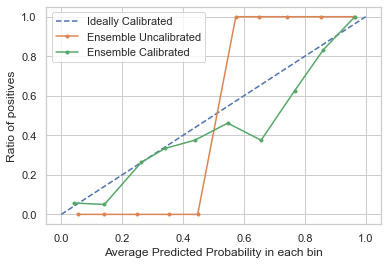

In [24]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2, random_state=5)
calibrated = CalibratedClassifierCV(ensemble, method='sigmoid', cv=10)
calibrated.fit(xtrain, ytrain)
probs = calibrated.predict_proba(xtest)[:, 1]
uncalibrated = ensemble.predict_proba(xtest)[:,1]
fop_uncalibrated, mpv_uncalibrated = calibration_curve(ytest, uncalibrated, n_bins=10, normalize=True)
fop_calibrated, mpv_calibrated = calibration_curve(ytest, probs, n_bins=10, normalize=True)
plt.plot([0, 1], [0, 1], linestyle='--', label = 'Ideally Calibrated')
plt.plot(mpv_uncalibrated, fop_uncalibrated, marker='.', label = 'Ensemble Uncalibrated')
plt.plot(mpv_calibrated, fop_calibrated, marker='.', label = 'Ensemble Calibrated')
leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

In [25]:
calibrated = CalibratedClassifierCV(ensemble, method='sigmoid', cv=10)

showResults(calibrated, "Ensemble Cal", X, Y)

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

K-fold cross-validation results:
Ensemble Cal  average accuracy is 0.850
Ensemble Cal  average log_loss is 0.348
Ensemble Cal  average brier score is 0.106
Ensemble Cal  average auc is 0.927
Ensemble Cal  average recall is 0.799
Ensemble Cal  average precision is 0.880
Ensemble Cal  average f1 is 0.823


In [42]:
#RFECV with Random Forest Input + Post admission variables
X = X_balanced[['Abnormal_Lung_Signs', 'Age', 'Average_Daily_Use_Cigarettes', 'BMI', 'CKD', 'Cancers',
                'DiastolicBP', 'Drug_history', 'Dyspnea', 'Fever', 'Hospitalization_14_days_ago',
                'Hypertension', 'ICU_admission', 'Intubation_Duration_Day', 'Oxygen_Saturation_Percent',
                'Pantoprazole', 'Respiratory_rate', 'SystolicBP']]
Y = Y_balanced

In [43]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=300,
                   max_depth = 8, learning_rate = 0.1, colsample_bytree = 0.5)
svc = SVC(random_state=5, C = 100, gamma=0.1,kernel='rbf',probability=True)
mlp = MLPClassifier(max_iter=5000, random_state=5, activation = 'logistic', alpha = 0.0001, 
                    hidden_layer_sizes = 5, learning_rate = 'constant', solver = 'lbfgs')
rf = RandomForestClassifier(random_state=5, 
                            max_depth = 16, 
                            min_samples_leaf = 3, 
                            min_samples_split = 8, 
                            n_estimators = 100)
dt = DecisionTreeClassifier(random_state=5, 
                            criterion = 'entropy',
                            max_depth = 16,
                            min_samples_leaf = 3, 
                            min_samples_split = 12)
knn = KNeighborsClassifier(metric = 'manhattan',
                            n_neighbors = 20,
                            weights = 'distance')
lr = LogisticRegression(random_state=5, 
                        C = 100,
                        penalty = 'l1', 
                        solver = 'liblinear')
nb = GaussianNB(var_smoothing= 0.003511191734215131)

In [51]:
estimators=[("XGboost", xgb), ("SVM", svc), ("MLP", mlp), ("RandomForest", rf),
           ("DecisionTree", dt), ("KNN", knn)]

ensemble = VotingClassifier(estimators, voting='soft')

ensemble.fit(X,Y)

showResults(ensemble, "Ensemble", X, Y)

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

K-fold cross-validation results:
Ensemble  average accuracy is 0.885
Ensemble  average log_loss is 0.324
Ensemble  average brier score is 0.096
Ensemble  average auc is 0.926
Ensemble  average recall is 0.872
Ensemble  average precision is 0.897
Ensemble  average f1 is 0.881


In [52]:
#Feature importance with Random Forest Input
X = X_balanced[["Age", "CKD", "Oxygen_Saturation_Percent" , "DiastolicBP" , "BMI", 
                "Hypertension", "Cancers", "Cardiovascular_Disease", "Hospitalization_14_days_ago" ,
                "Abnormal_Lung_Signs", "Average_Daily_Use_Cigarettes" , "Pantoprazole"]]
Y = Y_balanced

In [53]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=900,
                   max_depth = 15, learning_rate = 0.01, colsample_bytree = 0.8)
svc = SVC(random_state=5, C = 100, gamma=1,kernel='rbf',probability=True)
mlp = MLPClassifier(max_iter=5000, random_state=5, activation = 'logistic', alpha = 0.05, 
                    hidden_layer_sizes = (15,10), learning_rate = 'constant', solver = 'lbfgs')
rf = RandomForestClassifier(random_state=5, 
                            max_depth = 16, 
                            min_samples_leaf = 3, 
                            min_samples_split = 8, 
                            n_estimators = 100)
dt = DecisionTreeClassifier(random_state=5, 
                            criterion = 'entropy',
                            max_depth = 8,
                            min_samples_leaf = 3, 
                            min_samples_split = 12)
knn = KNeighborsClassifier(metric = 'euclidean',
                            n_neighbors = 12,
                            weights = 'distance')
lr = LogisticRegression(random_state=5, 
                        C = 10,
                        penalty = 'l2', 
                        solver = 'newton-cg')
nb = GaussianNB(var_smoothing= 0.001)

In [61]:
estimators=[("XGboost", xgb), ("MLP", mlp), ("RandomForest", rf)
           ]

ensemble = VotingClassifier(estimators, voting='soft')

ensemble.fit(X,Y)

showResults(ensemble, "Ensemble", X, Y)

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

K-fold cross-validation results:
Ensemble  average accuracy is 0.815
Ensemble  average log_loss is 0.406
Ensemble  average brier score is 0.130
Ensemble  average auc is 0.903
Ensemble  average recall is 0.822
Ensemble  average precision is 0.813
Ensemble  average f1 is 0.812


C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [15]:
#Feature importance with Random Forest Input + Post admission variables
X = X_balanced[["Intubation_Duration_Day", "Cancers", "CKD", "ICU_admission", "DiastolicBP",
               "SystolicBP", "Oxygen_Saturation_Percent", "Hospitalization_14_days_ago", "Chestpain",
               "Antihypertensive_drug", "Sweating", "BMI", "Cardiovascular_Disease", "Pantoprazole", 
               "Current_Smoking", "Average_Daily_Use_Cigarettes"]]
Y = Y_balanced

In [16]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=700,
                   max_depth = 8, learning_rate = 0.01, colsample_bytree = 0.3)
svc = SVC(random_state=5, C = 100, gamma=1,kernel='rbf',probability=True)
mlp = MLPClassifier(max_iter=5000, random_state=5, activation = 'logistic', alpha = 0.05, 
                    hidden_layer_sizes = (15,10), learning_rate = 'constant', solver = 'lbfgs')
rf = RandomForestClassifier(random_state=5, 
                            max_depth = 16, 
                            min_samples_leaf = 3, 
                            min_samples_split = 8, 
                            n_estimators = 300)
dt = DecisionTreeClassifier(random_state=5, 
                            criterion = 'gini',
                            max_depth = 4,
                            min_samples_leaf = 3, 
                            min_samples_split = 8)
knn = KNeighborsClassifier(metric = 'manhattan',
                            n_neighbors = 6,
                            weights = 'distance')
lr = LogisticRegression(random_state=5, 
                        C = 1000,
                        penalty = 'l2', 
                        solver = 'lbfgs')
nb = GaussianNB(var_smoothing= 0.8111308307896871)

In [17]:
estimators=[("XGboost", xgb),  ("MLP", mlp), ("RandomForest", rf),
          ]

ensemble = VotingClassifier(estimators, voting='soft')

ensemble.fit(X,Y)

showResults(ensemble, "Ensemble", X, Y)

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

K-fold cross-validation results:
Ensemble  average accuracy is 0.890
Ensemble  average log_loss is 0.291
Ensemble  average brier score is 0.086
Ensemble  average auc is 0.936
Ensemble  average recall is 0.883
Ensemble  average precision is 0.892
Ensemble  average f1 is 0.886


C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

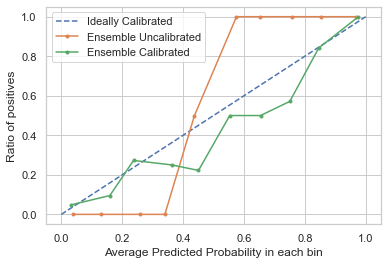

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2, random_state=5)
calibrated = CalibratedClassifierCV(ensemble, method='sigmoid', cv=10)
calibrated.fit(xtrain, ytrain)
probs = calibrated.predict_proba(xtest)[:, 1]
uncalibrated = ensemble.predict_proba(xtest)[:,1]
fop_uncalibrated, mpv_uncalibrated = calibration_curve(ytest, uncalibrated, n_bins=10, normalize=True)
fop_calibrated, mpv_calibrated = calibration_curve(ytest, probs, n_bins=10, normalize=True)
plt.plot([0, 1], [0, 1], linestyle='--', label = 'Ideally Calibrated')
plt.plot(mpv_uncalibrated, fop_uncalibrated, marker='.', label = 'Ensemble Uncalibrated')
plt.plot(mpv_calibrated, fop_calibrated, marker='.', label = 'Ensemble Calibrated')
leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

In [19]:
calibrated = CalibratedClassifierCV(ensemble, method='sigmoid', cv=10)

showResults(calibrated, "Ensemble Cal", X, Y)

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

K-fold cross-validation results:
Ensemble Cal  average accuracy is 0.888
Ensemble Cal  average log_loss is 0.299
Ensemble Cal  average brier score is 0.087
Ensemble Cal  average auc is 0.933
Ensemble Cal  average recall is 0.870
Ensemble Cal  average precision is 0.897
Ensemble Cal  average f1 is 0.880


In [10]:
#Feature Importance Gradient Boosting
X = X_balanced[["Age" , "Oxygen_Saturation_Percent", "CKD","Respiratory_rate", "DiastolicBP", 
                "SystolicBP","BMI", "Average_Daily_Use_Cigarettes" , "Pantoprazole", "Cancers",
                "Hypertension", "Abnormal_Lung_Signs", "Drug_history", "Sex", 
                "Total_Lung_Involvement_Percent", "Hospitalization_14_days_ago",
                "Current_Smoking", "Cardiovascular_Disease", "COPD", "Diabetes"]]
Y = Y_balanced

In [11]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=500,
                   max_depth = 15, learning_rate = 0.01, colsample_bytree = 0.3)
svc = SVC(random_state=5, C = 100, gamma=1,kernel='rbf',probability=True)
mlp = MLPClassifier(max_iter=5000, random_state=5, activation = 'relu', alpha = 0.05, 
                    hidden_layer_sizes = 10, learning_rate = 'constant', solver = 'lbfgs')
rf = RandomForestClassifier(random_state=5, 
                            max_depth = 32, 
                            min_samples_leaf = 3, 
                            min_samples_split = 8, 
                            n_estimators = 900)
dt = DecisionTreeClassifier(random_state=5, 
                            criterion = 'gini',
                            max_depth = 8,
                            min_samples_leaf = 3, 
                            min_samples_split = 12)
knn = KNeighborsClassifier(metric = 'manhattan',
                            n_neighbors = 10,
                            weights = 'distance')
lr = LogisticRegression(random_state=5, 
                        C = 1,
                        penalty = 'l1', 
                        solver = 'liblinear')
nb = GaussianNB(var_smoothing= 0.0004328761281083057)

In [18]:
estimators=[("XGboost", xgb), ("SVM", svc), ("RandomForest", rf),
           ("DecisionTree", dt), ("KNN", knn),("LogisticRegression", lr)]

ensemble = VotingClassifier(estimators, voting='soft')

ensemble.fit(X,Y)

showResults(ensemble, "Ensemble", X, Y)

K-fold cross-validation results:
Ensemble  average accuracy is 0.843
Ensemble  average log_loss is 0.405
Ensemble  average brier score is 0.123
Ensemble  average auc is 0.925
Ensemble  average recall is 0.833
Ensemble  average precision is 0.845
Ensemble  average f1 is 0.830


In [10]:
#Feature Importance Gradient Boosting + Post admission variables
X = X_balanced[["ICU_admission", "Age", "Intubation_Duration_Day", "Oxygen_Saturation_Percent", "CKD", 
               "Cancers", "Respiratory_rate", "SystolicBP", "DiastolicBP", "BMI", "Average_Daily_Use_Cigarettes",
               "Drug_history", "Abnormal_Lung_Signs", "COPD", "Sweating", "Total_Lung_Involvement_Percent", 
                "Chestpain", "Cardiovascular_Disease", "Sex", "Hospitalization_14_days_ago"]]
Y = Y_balanced

In [11]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=500,
                   max_depth = 10, learning_rate = 0.01, colsample_bytree = 0.5)
svc = SVC(random_state=5, C = 100, gamma=1,kernel='rbf',probability=True)
mlp = MLPClassifier(max_iter=5000, random_state=5, activation = 'logistic', alpha = 0.05, 
                    hidden_layer_sizes = 10, learning_rate = 'constant', solver = 'lbfgs')
rf = RandomForestClassifier(random_state=5, 
                            max_depth = 16, 
                            min_samples_leaf = 3, 
                            min_samples_split = 8, 
                            n_estimators = 500)
dt = DecisionTreeClassifier(random_state=5, 
                            criterion = 'gini',
                            max_depth = 16,
                            min_samples_leaf = 5, 
                            min_samples_split = 8)
knn = KNeighborsClassifier(metric = 'manhattan',
                            n_neighbors = 12,
                            weights = 'distance')
lr = LogisticRegression(random_state=5, 
                        C = 1,
                        penalty = 'l1', 
                        solver = 'liblinear')
nb = GaussianNB(var_smoothing= 8.111308307896872e-07)

In [18]:
estimators=[("XGboost", xgb), ("SVM", svc),  ("RandomForest", rf),
           ("DecisionTree", dt)]

ensemble = VotingClassifier(estimators, voting='soft')

ensemble.fit(X,Y)

showResults(ensemble, "Ensemble", X, Y)

K-fold cross-validation results:
Ensemble  average accuracy is 0.881
Ensemble  average log_loss is 0.297
Ensemble  average brier score is 0.088
Ensemble  average auc is 0.934
Ensemble  average recall is 0.868
Ensemble  average precision is 0.891
Ensemble  average f1 is 0.876


In [19]:
#Physician Opinion Input 
X = X_balanced[["Age", "BMI", "SystolicBP", "DiastolicBP", "Respiratory_rate",
            "Oxygen_Saturation_Percent", "Total_Lung_Involvement_Percent", 
            "Sex", "Current_Smoking", "History_hookah", "Drug_history", "Fever", "Dyspnea", "Chestpain", 
            "Diabetes", "Hypertension", "Cancers", "Cardiovascular_Disease", "CKD", "COPD", "Immunosuppressant_Drugs"]]
Y = Y_balanced

In [20]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=300,
                   max_depth = 15, learning_rate = 0.01, colsample_bytree = 0.5)
svc = SVC(random_state=5, C = 0.1, gamma=1,kernel='poly',probability=True)
mlp = MLPClassifier(max_iter=5000, random_state=5, activation = 'relu', alpha = 0.0001, 
                    hidden_layer_sizes = (15,10), learning_rate = 'constant', solver = 'lbfgs')
rf = RandomForestClassifier(random_state=5, 
                            max_depth = 32, 
                            min_samples_leaf = 3, 
                            min_samples_split = 8, 
                            n_estimators = 700)
dt = DecisionTreeClassifier(random_state=5, 
                            criterion = 'entropy',
                            max_depth = 16,
                            min_samples_leaf = 3, 
                            min_samples_split = 8)
knn = KNeighborsClassifier(metric = 'euclidean',
                            n_neighbors = 6,
                            weights = 'distance')
lr = LogisticRegression(random_state=5, 
                        C = 1,
                        penalty = 'l1', 
                        solver = 'liblinear')
nb = GaussianNB(var_smoothing= 0.12328467394420659)

In [28]:
estimators=[("XGboost", xgb), ("MLP", mlp), ("RandomForest", rf),
           ("DecisionTree", dt), ("KNN", knn)]

ensemble = VotingClassifier(estimators, voting='soft')

ensemble.fit(X,Y)

showResults(ensemble, "Ensemble", X, Y)

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

K-fold cross-validation results:
Ensemble  average accuracy is 0.837
Ensemble  average log_loss is 0.377
Ensemble  average brier score is 0.118
Ensemble  average auc is 0.915
Ensemble  average recall is 0.846
Ensemble  average precision is 0.825
Ensemble  average f1 is 0.832


In [10]:
#Physician Opinion Input + Post admission variables
X = X_balanced[["Age", "BMI", "SystolicBP", "DiastolicBP", "Respiratory_rate",
            "Oxygen_Saturation_Percent", "Total_Lung_Involvement_Percent", 
            "Sex", "Current_Smoking", "History_hookah", "Drug_history", "Fever", "Dyspnea", "Chestpain", 
            "Diabetes", "Hypertension", "Cancers", "Cardiovascular_Disease", "CKD", "COPD", "Immunosuppressant_Drugs",
            'Intubation_Duration_Day','NIV_Duration_Day',"ICU_admission"]]
Y = Y_balanced

In [11]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=300,
                   max_depth = 15, learning_rate = 0.01, colsample_bytree = 0.3)
svc = SVC(random_state=5, C = 100, gamma=1,kernel='poly',probability=True)
mlp = MLPClassifier(max_iter=5000, random_state=5, activation = 'tanh', alpha = 0.05, 
                    hidden_layer_sizes = 10, learning_rate = 'constant', solver = 'lbfgs')
rf = RandomForestClassifier(random_state=5, 
                            max_depth = 16, 
                            min_samples_leaf = 3, 
                            min_samples_split = 8, 
                            n_estimators = 300)
dt = DecisionTreeClassifier(random_state=5, 
                            criterion = 'gini',
                            max_depth = 16,
                            min_samples_leaf = 3, 
                            min_samples_split = 10)
knn = KNeighborsClassifier(metric = 'manhattan',
                            n_neighbors = 6,
                            weights = 'distance')
lr = LogisticRegression(random_state=5, 
                        C = 10,
                        penalty = 'l2', 
                        solver = 'newton-cg')
nb = GaussianNB(var_smoothing= 2.310129700083158e-08)

In [12]:
estimators=[("XGboost", xgb), ("SVM", svc),  ("RandomForest", rf),
           ("DecisionTree", dt), ("KNN", knn)]

ensemble = VotingClassifier(estimators, voting='soft')

ensemble.fit(X,Y)

showResults(ensemble, "Ensemble", X, Y)

K-fold cross-validation results:
Ensemble  average accuracy is 0.891
Ensemble  average log_loss is 0.326
Ensemble  average brier score is 0.094
Ensemble  average auc is 0.936
Ensemble  average recall is 0.899
Ensemble  average precision is 0.885
Ensemble  average f1 is 0.890


C:\Users\alish\anaconda3\lib\site-packages\sklearn\calibration.py:964: FutureWarning: The normalize argument is deprecated in v1.1 and will be removed in v1.3. Explicitly normalizing y_prob will reproduce this behavior, but it is recommended that a proper probability is used (i.e. a classifier's `predict_proba` positive class or `decision_function` output calibrated with `CalibratedClassifierCV`).
  warnings.warn(


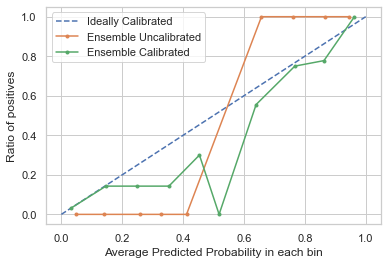

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2, random_state=5)
calibrated = CalibratedClassifierCV(ensemble, method='sigmoid', cv=10)
calibrated.fit(xtrain, ytrain)
probs = calibrated.predict_proba(xtest)[:, 1]
uncalibrated = ensemble.predict_proba(xtest)[:,1]
fop_uncalibrated, mpv_uncalibrated = calibration_curve(ytest, uncalibrated, n_bins=10, normalize=True)
fop_calibrated, mpv_calibrated = calibration_curve(ytest, probs, n_bins=10, normalize=True)
plt.plot([0, 1], [0, 1], linestyle='--', label = 'Ideally Calibrated')
plt.plot(mpv_uncalibrated, fop_uncalibrated, marker='.', label = 'Ensemble Uncalibrated')
plt.plot(mpv_calibrated, fop_calibrated, marker='.', label = 'Ensemble Calibrated')
leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

In [14]:
calibrated = CalibratedClassifierCV(ensemble, method='sigmoid', cv=10)

showResults(calibrated, "Ensemble Cal", X, Y)

K-fold cross-validation results:
Ensemble Cal  average accuracy is 0.885
Ensemble Cal  average log_loss is 0.292
Ensemble Cal  average brier score is 0.086
Ensemble Cal  average auc is 0.935
Ensemble Cal  average recall is 0.870
Ensemble Cal  average precision is 0.894
Ensemble Cal  average f1 is 0.879
